In [5]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import preprocessing, cluster
import matplotlib.pyplot as plt
%matplotlib inline

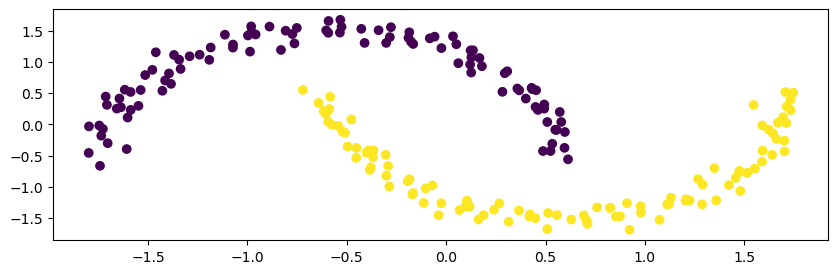

In [15]:
#正解データの可視化
X, z = datasets.make_moons(n_samples=200, noise=0.05,random_state=0)
sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
x = X_norm[:, 0]
y = X_norm[:, 1]
plt.figure(figsize=(10, 3))
plt.scatter(x = x, y = y, c = z)
plt.show()

c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[-0.74231098,  0.80088824],
       [ 0.72761175, -0.78502906]])

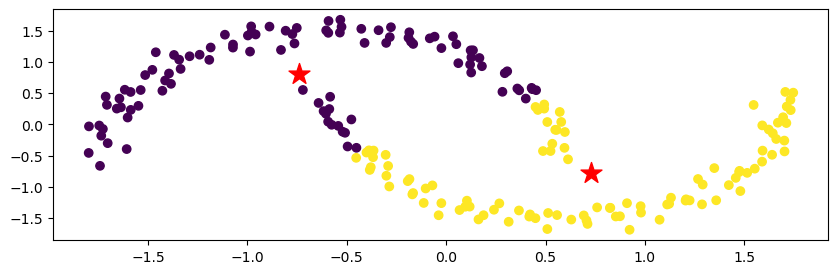

In [24]:
#kmeansでクラスタリング
from sklearn.cluster import KMeans
import seaborn as sns
km_data = X_norm.copy()
df_km_data = pd.DataFrame(km_data)
model = KMeans(n_clusters=2, init="random", random_state=0)
model.fit(df_km_data)
cls = model.predict(df_km_data)
df_km_data["cluster"] = cls
plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=df_km_data["cluster"])
cluster_center = model.cluster_centers_
display(cluster_center)
plt.scatter(cluster_center[:, 0], cluster_center[:, 1], s = 250,marker="*", color = "red")
plt.show()

## Spectral Clustering

c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


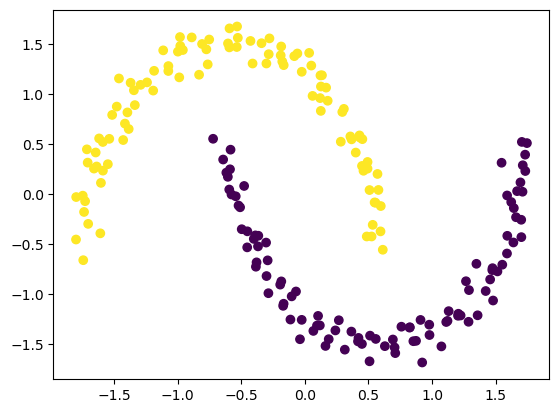

In [34]:
from sklearn import cluster
#nearest_neighborsは、最近傍のグラフを作成している
spc__ = X_norm.copy()
spc = cluster.SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
spc.fit(spc__)
#Kmeansと違い、predictではなく、labels_にクラスタ結果が格納されている
cls_spc = spc.labels_
plt.scatter(x, y, c=cls_spc)
plt.show()

## MeanShift

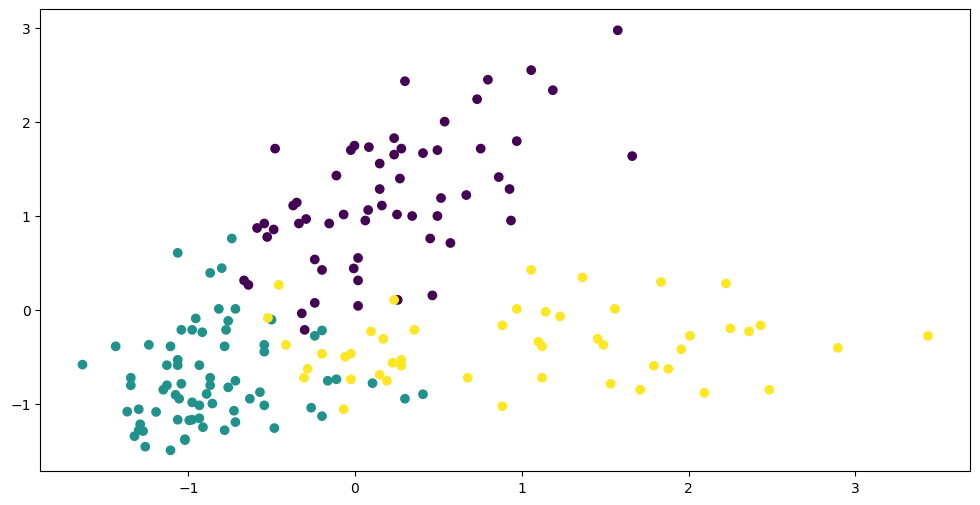

In [44]:
#ワインデータ使用
df_wine_all = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df_wine = df_wine_all[[0, 10, 13]]
df_wine.columns = [u"class", u"color", u"proline"]
pd.DataFrame(df_wine)
X = df_wine[["color", "proline"]]
sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
x = X_norm[:, 0]
y = X_norm[:, 1]
z = df_wine["class"]
plt.figure(figsize=(12,6))
plt.scatter(x, y, c = z)
plt.show()

c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rikuto\anaconda3\envs\cuda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


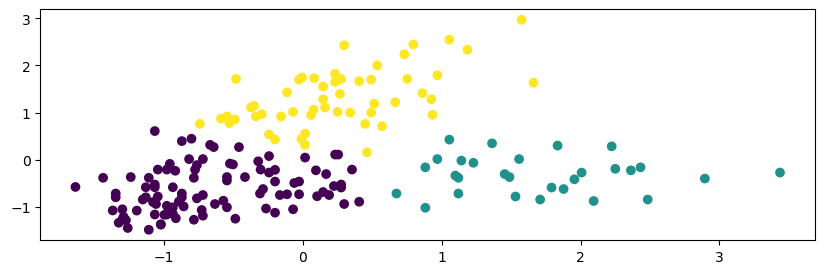

In [45]:
#kmeansでクラスタリング
km = KMeans(n_clusters=3)
km.fit(X_norm)
wine_km = km.predict(X_norm)
plt.figure(figsize=(10, 3))
plt.scatter(x, y, c = wine_km)
plt.show()

In [ ]:
#MeanShiftやってみる


## GMM